In [1]:
import pandas as pd
from statsmodels.stats.meta_analysis import combine_effects
import forestplot as fp

/var/folders/zr/w_9gpc_15tvbm65ms36b_g680000gn/T/ipykernel_76562/506743788.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
meta_data_complete = pd.read_excel('/Users/anasofiacc/Library/CloudStorage/OneDrive-UniversidadedeLisboa/PhD/PreEpiSeizures/Seizure forecast/Systematic review/meta-analysis.xlsx',
                          sheet_name='meta-analysis')
meta_data_complete = meta_data_complete[meta_data_complete['Authors'].notna()]

In [3]:
# add id column
meta_data_complete['ID'] = meta_data_complete['Study ID'] + " (" + meta_data_complete['Input data'].str.split(' ').str[0] + ")"

In [4]:
meta_data_complete

,Title,Study ID,Authors,Year,Mobile vs non-mobile,Controlled vs ambulatory,Dataset,# Patients,"Duration (per patient) (*) recorded duration, total otherwise",total # seizures (per patient),...,% of patients with significant forecasts,Acc (mean),Acc (SD),FAR (/day),BS (mean),BS (SD),BSS (mean),BSS (SD),Comment,ID
0,Seizure Forecasting from Subcutaneous EEG Usin...,"Attia et al., 2021",Attia et al.,2021.0,mobile,ambulatory,self-collected (24/7 EEG SubQ),1.0,230 days,22,...,1.00,NaN,NaN,5.822800,NaN,NaN,NaN,NaN,Best performing model,"Attia et al., 2021 (surrogate)"
1,NaN,"Attia et al., 2021",Attia et al.,2021.0,mobile,ambulatory,self-collected (24/7 EEG SubQ),1.0,230 days,22,...,1.00,NaN,NaN,2.622800,NaN,NaN,NaN,NaN,Best performing model,"Attia et al., 2021 (surrogate)"
2,Prediction of seizure likelihood with a long-t...,"Cook et al., 2013",Cook et al.,2013.0,mobile,ambulatory,NeuroVista,11.0,median: 288.6 days,median: 38,...,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEAN; 3 patients were not included due to low ...,"Cook et al., 2013 (surrogate)"
3,NaN,"Cook et al., 2013",Cook et al.,2013.0,mobile,ambulatory,NeuroVista,10.0,median: 288.6 days,median: 38,...,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEAN; 3 patients were not included due to low ...,"Cook et al., 2013 (surrogate)"
4,Can heart rate variability identify a high-ris...,"Cousyn et al., 2023",Cousyn et al.,2023.0,non-mobile,controlled,self-collected,15.0,median: 11 days,25,...,NaN,0.812,0.135868,NaN,NaN,NaN,NaN,NaN,Best model,"Cousyn et al., 2023 (surrogate)"
5,NaN,"Cousyn et al., 2023",Cousyn et al.,2023.0,non-mobile,controlled,self-collected,14.0,median: 11 days,25,...,NaN,NaN,NaN,NaN,0.3 [0.18;0.48],NaN,NaN,NaN,MEDIAN; Best model,"Cousyn et al., 2023 (surrogate)"
6,Daily resting-state intracranial EEG connectiv...,"Cousyn et al., 2022",Cousyn et al.,2022.0,non-mobile,controlled,self-collected,10.0,mean: 10.7 days,median: 2.4,...,NaN,"0.77 [0.52, 1]",NaN,NaN,NaN,NaN,NaN,NaN,MEAN; Best performing model,"Cousyn et al., 2022 (surrogate)"
7,NaN,"Cousyn et al., 2022",Cousyn et al.,2022.0,non-mobile,controlled,self-collected,10.0,mean: 10.7 days,median: 2.4,...,NaN,NaN,NaN,NaN,0.13,NaN,0.72,NaN,MEAN,"Cousyn et al., 2022 (surrogate)"
8,Forecasting cycles of seizure likelihood,"Karoly et al., 2020",Karoly et al.,2020.0,mobile,ambulatory,Seer medical + NeuroVista,50.0,mean: 336 days,mean: 109,...,NaN,0.691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Karoly et al., 2020 (cyclic)"
9,The circadian profile of epilepsy improves sei...,"Karoly et al., 2017",Karoly et al.,2017.0,mobile,ambulatory,NeuroVista,9.0,median: 419.888888888889 days,median: 116.111111111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEAN; SD of BSS also available; not sure se al...,"Karoly et al., 2017 (surrogate)"


In [5]:
effect_size = "AUC"
required_columns = ['ID', '# Patients', f'{effect_size} (mean)', f'{effect_size} (SD)', "Input data"]
meta_data = meta_data_complete.loc[(meta_data_complete[f'{effect_size} (SD)'].notna() & meta_data_complete[f'{effect_size} (SD)'] != 0), required_columns]
#meta_data[f'{effect_size} (variance)'] = meta_data[f'{effect_size} (SD)'] ** 2
meta_data["SE"] = meta_data[f'{effect_size} (SD)'] / meta_data['# Patients'] ** 0.5
meta_data["var"] = meta_data["SE"] ** 2
#meta_data["weights"] = 1 / (meta_data["SE"] ** 2)
meta_data


,ID,# Patients,AUC (mean),AUC (SD),Input data,SE,var
4,"Cousyn et al., 2023 (surrogate)",15.0,0.792,0.167041,surrogate measures of preictal state,0.043130,0.001860
6,"Cousyn et al., 2022 (surrogate)",10.0,0.912,0.096586,surrogate measures of preictal state,0.030543,0.000933
18,"Nasseri et al., 2021 (both)",6.0,0.804,0.089610,both,0.036583,0.001338
19,"Payne et al., 2020 (surrogate)",8.0,0.6295,0.108495,surrogate measures of preictal state,0.038359,0.001471
20,"Payne et al., 2020 (cyclic)",8.0,0.69375,0.079744,cyclic distribution of events,0.028194,0.000795
21,"Payne et al., 2020 (both)",8.0,0.68425,0.105233,both,0.037205,0.001384
27,"Stirling et al., 2021 (both)",11.0,0.585,0.163270,both,0.049228,0.002423
28,"Stirling et al., 2021 (both)",8.0,0.585,0.163270,both,0.057725,0.003332
29,"Stirling et al., 2021 (both)",11.0,0.6775,0.177100,both,0.053398,0.002851
30,"Stirling et al., 2021 (both)",8.0,0.6775,0.177100,both,0.062614,0.003921


In [6]:
res = combine_effects(meta_data[f'{effect_size} (mean)'], meta_data["var"], row_names=meta_data["ID"])

In [7]:
res_df = res.summary_frame()
res_df.drop(columns=["w_fe"], inplace=True)
res_df.drop(["fixed effect", "fixed effect wls"], inplace=True)
res_df.drop(["random effect", "random effect wls"], inplace=True)
res_df["ID"] = res_df.index 
res_df

,eff,sd_eff,ci_low,ci_upp,w_re,ID
"Cousyn et al., 2023 (surrogate)",0.792,0.04313,0.707467,0.876533,0.063019,"Cousyn et al., 2023 (surrogate)"
"Cousyn et al., 2022 (surrogate)",0.912,0.030543,0.852136,0.971864,0.072529,"Cousyn et al., 2022 (surrogate)"
"Nasseri et al., 2021 (both)",0.804,0.036583,0.732298,0.875702,0.06804,"Nasseri et al., 2021 (both)"
"Payne et al., 2020 (surrogate)",0.6295,0.038359,0.554318,0.704682,0.066685,"Payne et al., 2020 (surrogate)"
"Payne et al., 2020 (cyclic)",0.69375,0.028194,0.638491,0.749009,0.074195,"Payne et al., 2020 (cyclic)"
"Payne et al., 2020 (both)",0.68425,0.037205,0.611329,0.757171,0.067566,"Payne et al., 2020 (both)"
"Stirling et al., 2021 (both)",0.585,0.049228,0.488515,0.681485,0.058371,"Stirling et al., 2021 (both)"
"Stirling et al., 2021 (both)",0.585,0.057725,0.471862,0.698138,0.052163,"Stirling et al., 2021 (both)"
"Stirling et al., 2021 (both)",0.6775,0.053398,0.572843,0.782157,0.055274,"Stirling et al., 2021 (both)"
"Stirling et al., 2021 (both)",0.6775,0.062614,0.554778,0.800222,0.048803,"Stirling et al., 2021 (both)"


<Axes: xlabel='AUC', ylabel='Confidence interval'>

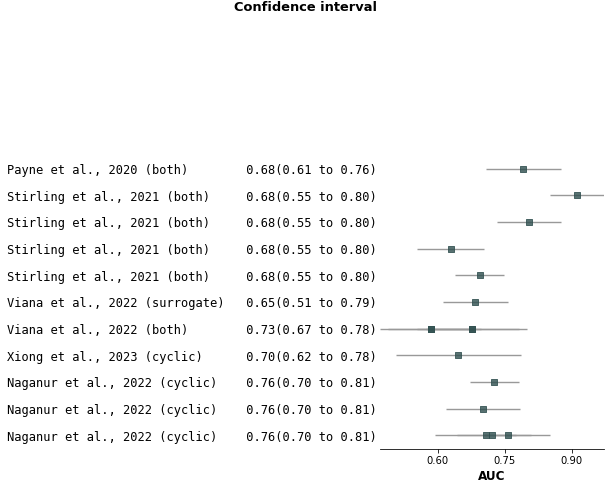

In [8]:
fp.forestplot(res_df,  # the dataframe with results data
              estimate="eff",  # col containing estimated effect size 
              ll="ci_low", hl="ci_upp",  # columns containing conf. int. lower and higher limits
              varlabel="ID",  # column containing variable label
              ylabel="Confidence interval",  # y-label title
              xlabel="AUC",  # x-label title
              )